# **1. Perkenalan Dataset**


1. **Sumber**:

   [Customer Shopping Dataset - Retail Sales Data](https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset) 
   
   > Welcome to the shopping world of Istanbul! Our dataset contains shopping information from 10 different shopping malls between 2021 and 2023. We have gathered data from various age groups and genders to provide a comprehensive view of shopping habits in Istanbul. The dataset includes essential information such as invoice numbers, customer IDs, age, gender, payment methods, product categories, quantity, price, order dates, and shopping mall locations.

2. **Ketentuan**:

   ☑ **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.

   ☑ **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   
   ☑ **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   ☑ Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

## Tujuan Clustering
Mengelompokkan pelanggan berdasarkan perilaku belanja mereka untuk mengidentifikasi kelompok-kelompok dengan karakteristik dan pola pembelian yang serupa. Segmentasi ini bertujuan untuk membantu stakeholders dalam menyesuaikan strategi pemasaran, meningkatkan layanan pelanggan, dan mengoptimalkan efisiensi operasional. Potential stekholders untuk analisis ini antara lain: retailer, pengelola mall, tim pemasaran, tim strategi bisnis, analis keuangan, investor, pemerintah, dan akademisi atau researcher.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

from itertools import combinations
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OrdinalEncoder
from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
dir_ = "dataset/"
filename = "customer_shopping_data.csv"
filepath = dir_ + filename
df = pd.read_csv(filepath)
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 1. Memahami Struktur Data
### Jumlah Baris & Kolom

In [3]:
df.shape

(99457, 10)

Dataset terdiri dari 99,457 baris dan 10 kolom

### Jenis Data Per Kolom

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


Kolom dengan tipe data numerik:
- age
- quantity
- price

Kolom dengan tipe data kategorik
- invoice_no
- customer_id
- gender
- category
- payment_method
- invoice_date (perlu kita ubah ke date atau datetime)
- shopping_mall

## 2. Menangani Data Yang Hilang

In [5]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

- Dataset tidak mengandung missing values

## 3. **Analisis Distribusi dan Korelasi**  
### Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  

In [6]:
df_numeric = df.select_dtypes(include=['number'])
print(df_numeric.describe())

                age      quantity         price
count  99457.000000  99457.000000  99457.000000
mean      43.427089      3.003429    689.256321
std       14.990054      1.413025    941.184567
min       18.000000      1.000000      5.230000
25%       30.000000      2.000000     45.450000
50%       43.000000      3.000000    203.300000
75%       56.000000      4.000000   1200.320000
max       69.000000      5.000000   5250.000000


In [7]:
numeric_columns = list(df_numeric.columns)
numeric_columns

['age', 'quantity', 'price']

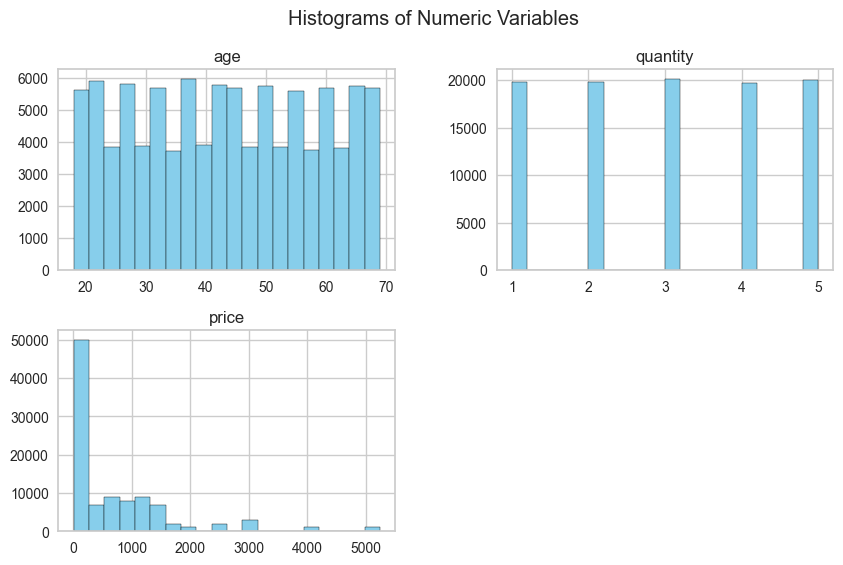

In [8]:
# Membuat histogram untuk semua kolom numerik
df_numeric.hist(bins=20, figsize=(10, 6), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numeric Variables')
plt.show()

### Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

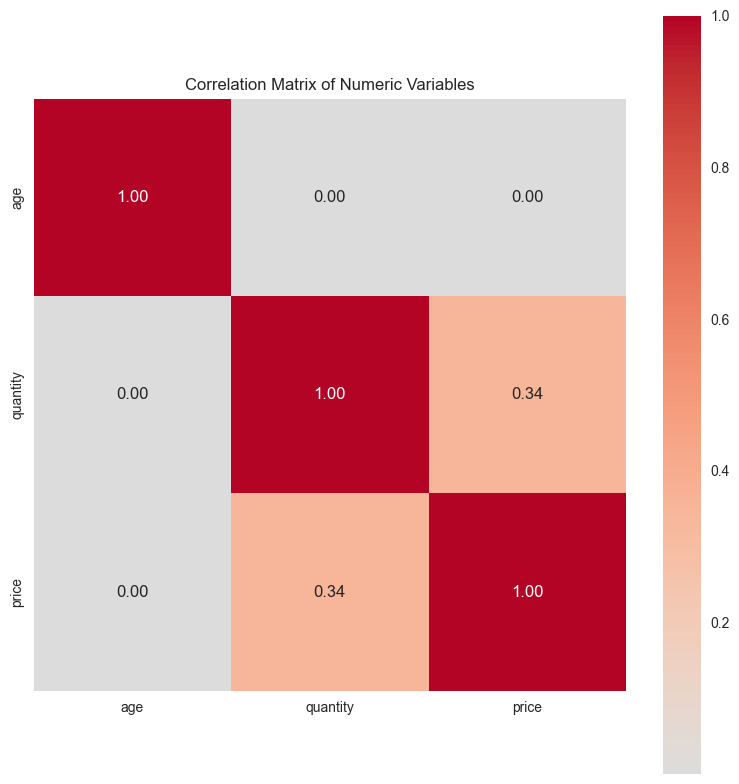


Correlation Matrix:
          age  quantity  price
age       1.0      0.00   0.00
quantity  0.0      1.00   0.34
price     0.0      0.34   1.00


In [9]:
# Select only numerical columns for correlation
correlation_matrix = df[numeric_columns].corr()

# Create correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, 
           annot=True,  # Show correlation values
           cmap='coolwarm',  # Color scheme: red for positive, blue for negative
           center=0,  # Set 0 as the center value for colors
           fmt='.2f',  # Format numbers to 2 decimal places
           square=True)  # Make cells square-shaped
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

# Optional: Display correlation values in table format
print("\nCorrelation Matrix:")
print(correlation_matrix.round(2))

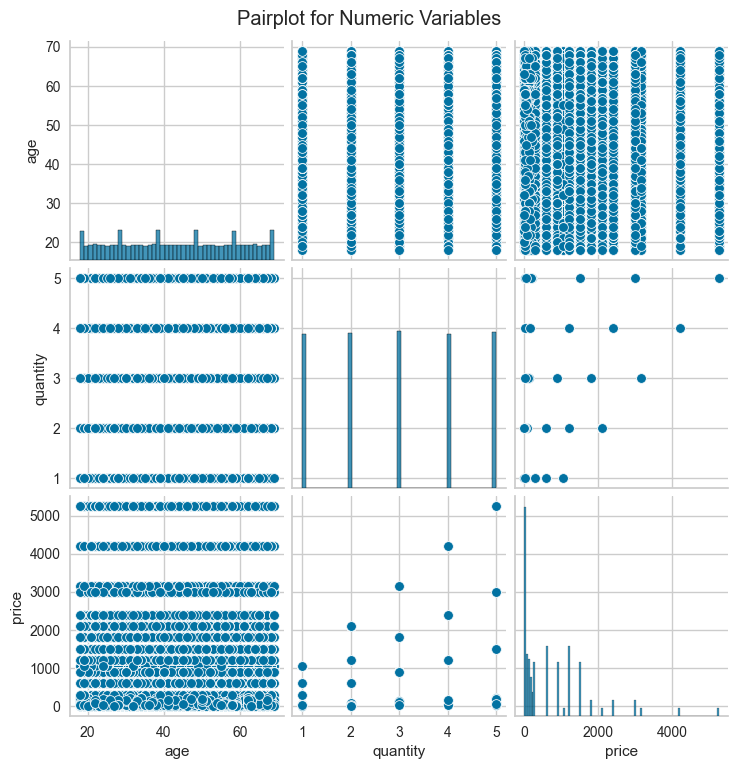

In [10]:
sns.pairplot(df)
plt.suptitle(f"Pairplot for Numeric Variables", y=1.02)  # y=1.02 to adjust title position
plt.show()

- Berdasarkan correlation matrix & pariplot di atas, tidak terdapat hubungan yang kuat antara ketiga variabel numerik.

## 4. **Visualisasi Data**  
### Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  

In [11]:
# Memilih kolom kategorikal
categoric_columns = df.select_dtypes(include=['object'])

# Statistik deskriptif untuk variabel kategorikal
for col in categoric_columns.columns:
    print(f"Descriptiive Statistics for '{col}':")
    print(df[col].describe())
    print("\n")

Descriptiive Statistics for 'invoice_no':
count       99457
unique      99457
top       I232867
freq            1
Name: invoice_no, dtype: object


Descriptiive Statistics for 'customer_id':
count       99457
unique      99457
top       C273973
freq            1
Name: customer_id, dtype: object


Descriptiive Statistics for 'gender':
count      99457
unique         2
top       Female
freq       59482
Name: gender, dtype: object


Descriptiive Statistics for 'category':
count        99457
unique           8
top       Clothing
freq         34487
Name: category, dtype: object


Descriptiive Statistics for 'payment_method':
count     99457
unique        3
top        Cash
freq      44447
Name: payment_method, dtype: object


Descriptiive Statistics for 'invoice_date':
count          99457
unique           797
top       24/11/2021
freq             159
Name: invoice_date, dtype: object


Descriptiive Statistics for 'shopping_mall':
count                99457
unique                  10
top    

Catatan:
- count: banyaknya nilai/baris/item data
- unique: jumlah nilai unik
- top: nilai yang paling sering muncul atau memiliki frekuensi tertinggi (modus)
- freq: jumlah kemunculan nilai top/mode/modus

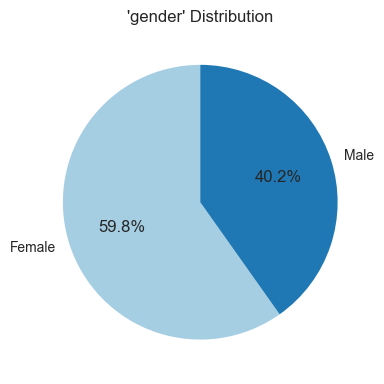

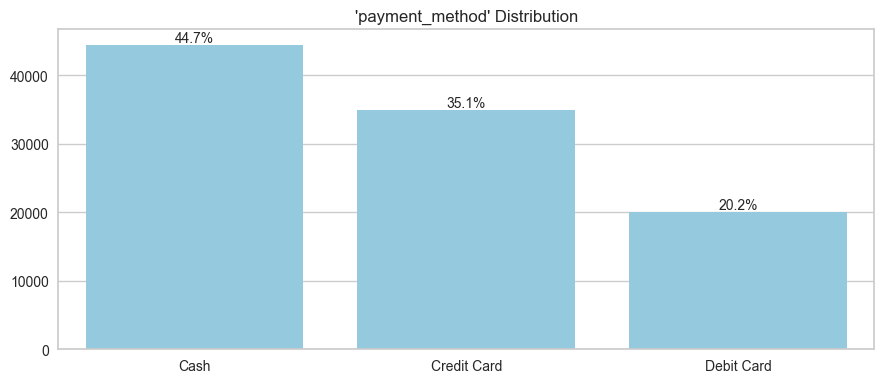

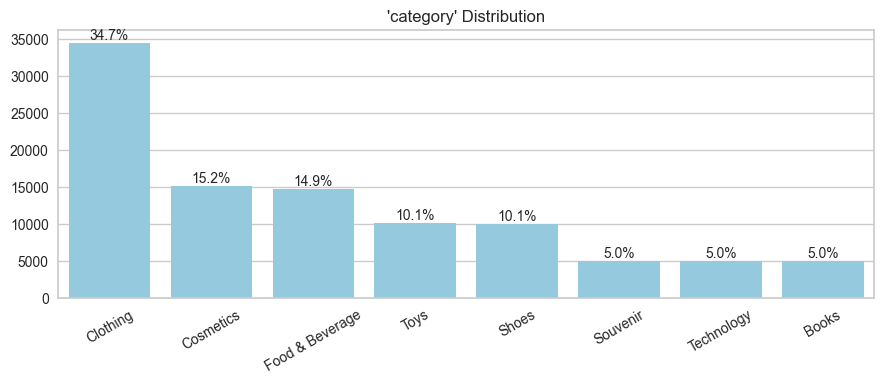

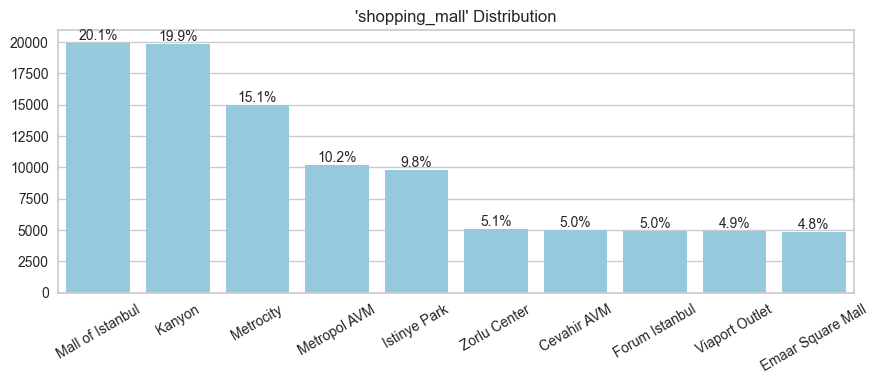

In [12]:
categoric_columns_to_pie = ['gender']
categoric_columns_to_bar = ['payment_method', 'category', 'shopping_mall']
categoric_columns = categoric_columns_to_pie + categoric_columns_to_bar

# Generate Pie Charts using Matplotlib
for col in categoric_columns_to_pie:
    plt.figure(figsize=(4, 4))
    # Get value counts and labels
    values = df[col].value_counts()
    labels = values.index
    
    # Create the pie chart
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title(f"'{col}' Distribution")
    plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
    plt.tight_layout()  # Prevent label cutoff
    plt.show()

# Generate Bar Charts using Seaborn with Percentage Labels
for col in categoric_columns_to_bar:
    plt.figure(figsize=(9, 4))
    
    # Get value counts and percentages
    value_counts = df[col].value_counts()
    percentages = (value_counts / value_counts.sum()) * 100
    
    # Create the bar chart
    ax = sns.countplot(data=df, 
                       x=col,
                       color='skyblue',  # Set single color to light blue
                       order=value_counts.index)
    
    # Add data labels for percentages
    for p, percentage in zip(ax.patches, percentages):
        height = p.get_height()
        ax.annotate(f'{percentage:.1f}%',  # Format percentage to 1 decimal place
                    (p.get_x() + p.get_width() / 2., height),  # Position in the center of the bar
                    ha='center', va='bottom', fontsize=10)
    
    # Set title and adjust layout
    plt.title(f"'{col}' Distribution")
    plt.ylabel('')
    plt.xlabel('')
    if col in ['category', 'shopping_mall']:
        plt.xticks(rotation=30)
    else:
        plt.xticks(rotation=0)
    plt.tight_layout()  # Prevent label cutoff
    plt.show()

- Lebih banyak customer perempuan daripada laki-laki dengan perbandingan kurang lebih 3:2
- Kategori pakaian (clothing) mendominasi total transaksi sebanyak kurang lebih 35%
- Metode pembayaran terdiri dari cash, credit card, & debit card
- Metode pembayaran yang paling sering digunakan adalah cash (sekitar 42%)
- Retail dengan transaksi tertinggi adalah Mall of Istanbul dan Kanyon dengan total transaksi mendekati masing-masing 20,000

### Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

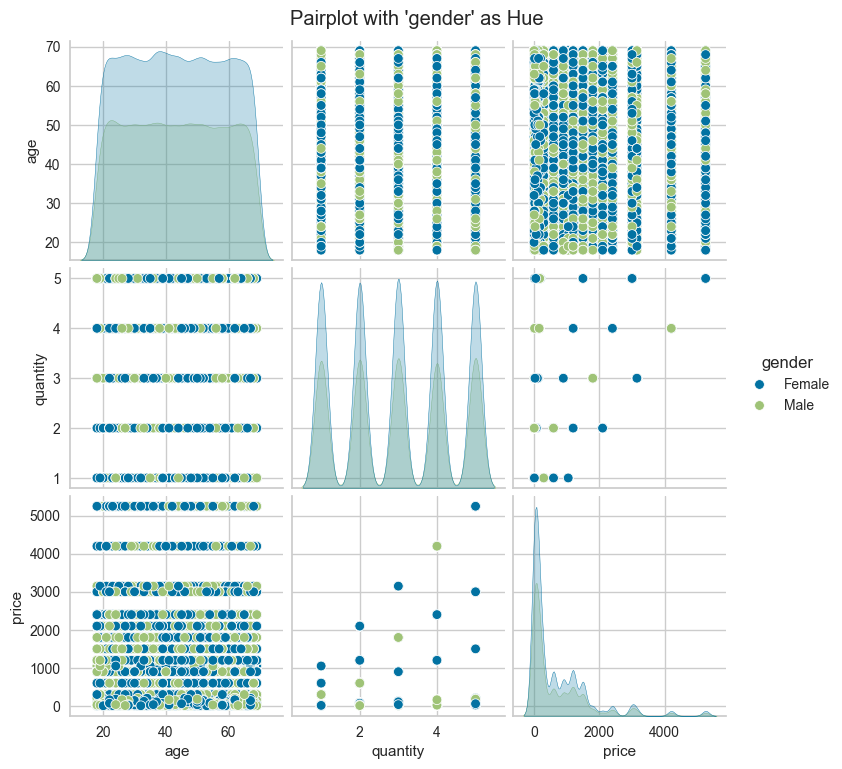

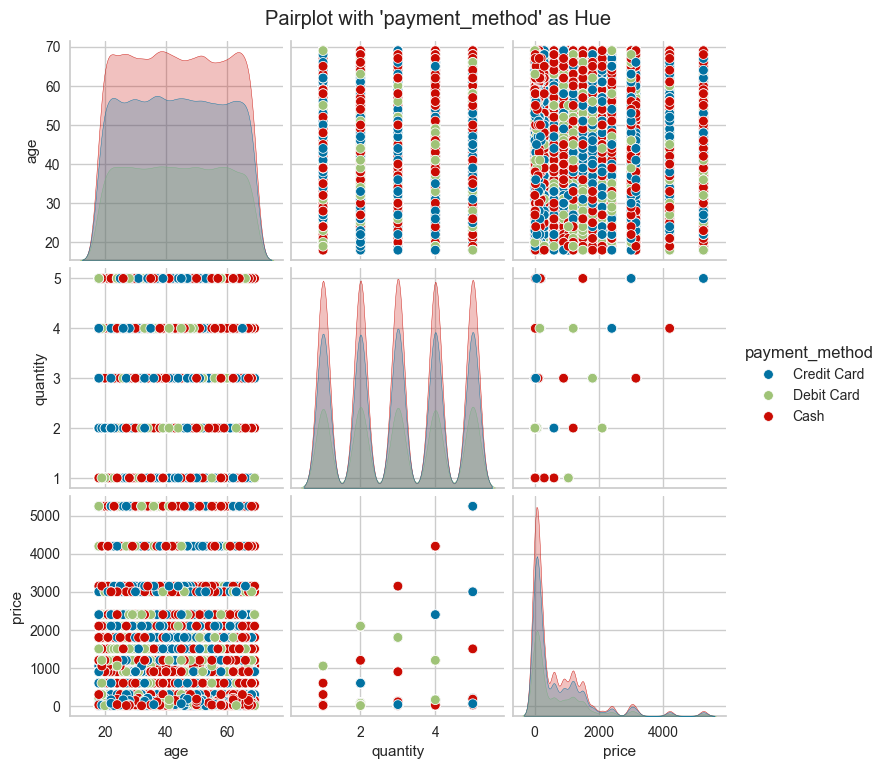

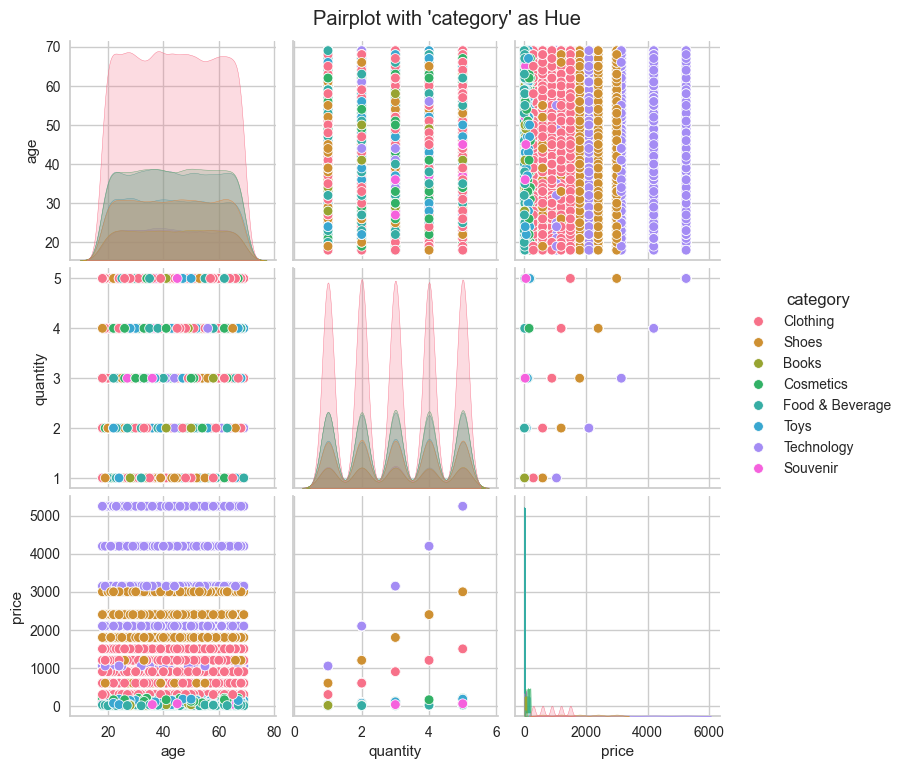

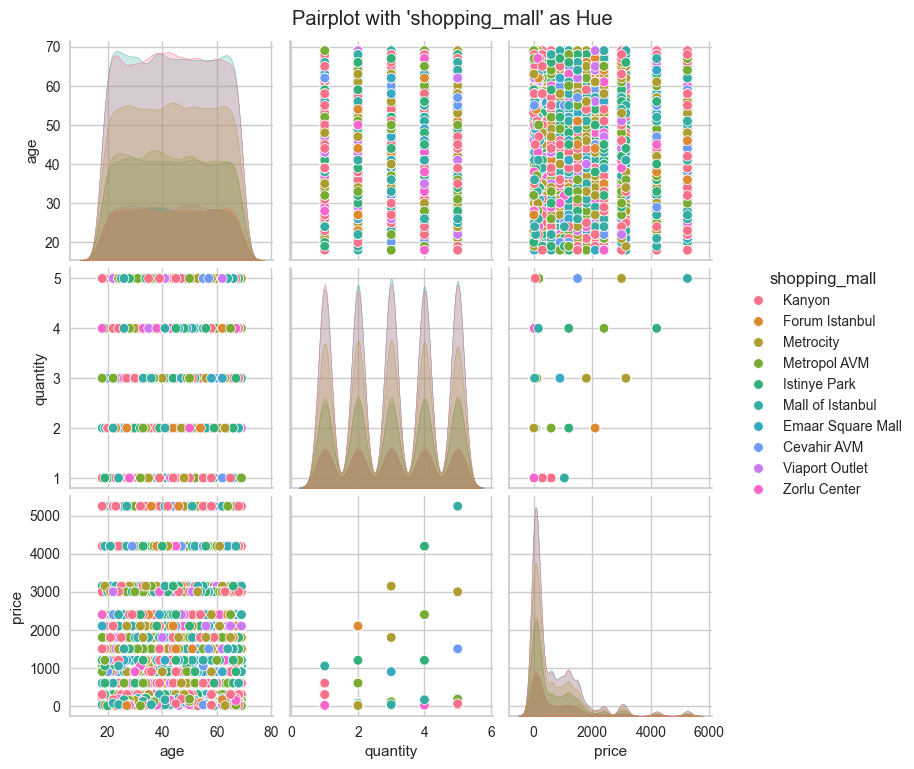

In [13]:
# Create pairplot each categorical column
for col in categoric_columns:
    sns.pairplot(df, hue=col, vars=numeric_columns, height=2.5)
    plt.suptitle(f"Pairplot with '{col}' as Hue", y=1.02)  # y=1.02 to adjust title position
    plt.show()

- Secara keseluruhan, belum terlihat pola yang jelas terkait hubungan antar variabel dari pairplot di atas

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values) -> tidak terdapat missing values
2. Menghapus Data Duplikat -> tidak terdapat data duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## Menghapus Data Duplikat

In [14]:
# Check for duplicates in the entire DataFrame
duplicates = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


- Tidak terdapat data duplikat

## Deteksi dan Penanganan Outlier

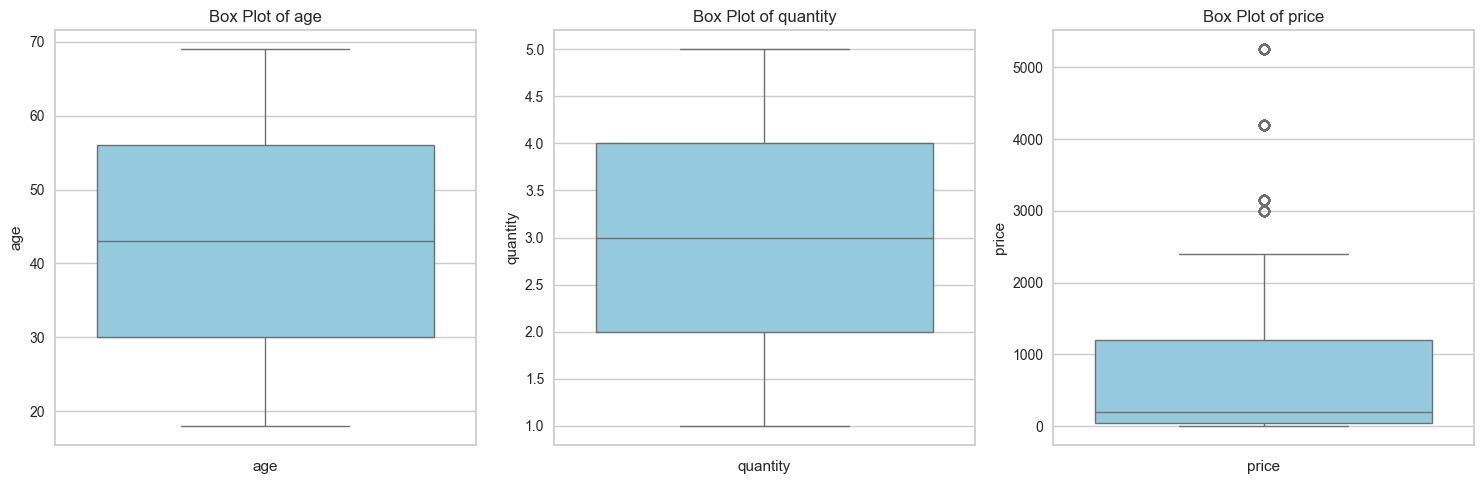

In [15]:
# Set the figure size for Boxplots
plt.figure(figsize=(15, 5))

# Loop through each numerical column
for i, col in enumerate(numeric_columns):
    plt.subplot(1, 3, i + 1)  # Create a subplot for each box plot in 1 row and 3 columns
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

- Berdasarkan boxplot di atas, terlihat ada outliers di variabel `price`, mari kita periksa.

In [16]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier conditions
outlier_condition = (df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))

# Get the outliers
outliers = df[outlier_condition]

# Display the outliers
print("Outliers in 'price':")
print(outliers[['price', 'category']])  # Adjust the columns as needed to see more information

Outliers in 'price':
         price    category
3      3000.85       Shoes
15     3000.85       Shoes
23     5250.00  Technology
53     4200.00  Technology
69     5250.00  Technology
...        ...         ...
99332  3000.85       Shoes
99374  3150.00  Technology
99387  3150.00  Technology
99424  3150.00  Technology
99455  4200.00  Technology

[5024 rows x 2 columns]


- Kita tidak perlu menghapus outliers ini karena masih wajar (tidak terindikasi human error / system error).

## Binning (Pengolompokan Data)

In [17]:
df['age'].describe()

count    99457.000000
mean        43.427089
std         14.990054
min         18.000000
25%         30.000000
50%         43.000000
75%         56.000000
max         69.000000
Name: age, dtype: float64

In [18]:
df_bin = df.copy()

# Define bins based on quartiles and additional ranges
bins_age = [18, 30, 43, 56, 69]  # 17 is below the minimum age (18), can be adjusted
labels_age_groups = ['18-30', '31-43', '44-56', '57-69']

# Create a new column 'age_bins' to hold the binned data
df_bin['age_groups'] = pd.cut(df_bin['age'], bins=bins_age, labels=labels_age_groups, right=True)

# Display the binned data
df_bin['age_groups'].value_counts()

age_groups
31-43    25050
44-56    24712
57-69    24671
18-30    23180
Name: count, dtype: int64

In [19]:
# Drop the 'age' column from df_bin
df_bin = df_bin.drop(columns=['age'])
df_bin.head()

,invoice_no,customer_id,gender,category,quantity,price,payment_method,invoice_date,shopping_mall,age_groups
0,I138884,C241288,Female,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,18-30
1,I317333,C111565,Male,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,18-30
2,I127801,C266599,Male,Clothing,1,300.08,Cash,9/11/2021,Metrocity,18-30
3,I173702,C988172,Female,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,57-69
4,I337046,C189076,Female,Books,4,60.60,Cash,24/10/2021,Kanyon,44-56


In [20]:
# Update numeric columns list
df_bin_numeric = df_bin.select_dtypes(include=['number'])
numeric_columns = list(df_bin_numeric.columns)
numeric_columns

['quantity', 'price']

In [21]:
# Update categoric columns list
categoric_columns = ['gender', 'payment_method', 'category', 'shopping_mall', 'age_groups']

## Normalisasi atau Standarisasi Fitur

In [22]:
# Initialize the MinMaxScaler
minmax_scaler = MinMaxScaler()

# Normalize the numerical columns
df_norm = df_bin.copy()
df_norm[numeric_columns] = minmax_scaler.fit_transform(df_norm[numeric_columns])

# Display the normalized DataFrame
print("Normalized DataFrame:")
df_norm.head()

Normalized DataFrame:


,invoice_no,customer_id,gender,category,quantity,price,payment_method,invoice_date,shopping_mall,age_groups
0,I138884,C241288,Female,Clothing,1.00,0.285078,Credit Card,5/8/2022,Kanyon,18-30
1,I317333,C111565,Male,Shoes,0.50,0.342299,Debit Card,12/12/2021,Forum Istanbul,18-30
2,I127801,C266599,Male,Clothing,0.00,0.056218,Cash,9/11/2021,Metrocity,18-30
3,I173702,C988172,Female,Shoes,1.00,0.571163,Credit Card,16/05/2021,Metropol AVM,57-69
4,I337046,C189076,Female,Books,0.75,0.010557,Cash,24/10/2021,Kanyon,44-56


In [23]:
df_norm[numeric_columns].describe()

,quantity,price
count,99457.000000,99457.000000
mean,0.500857,0.130421
std,0.353256,0.179452
min,0.000000,0.000000
25%,0.250000,0.007669
50%,0.500000,0.037765
75%,0.750000,0.227863
max,1.000000,1.000000


- `df_normalized` berisi dataframe dengan kolom variabel numerik yang sudah dinormalisasi dengan MinMaxScaler
- Normalisasi MinMaxScaler dipilih karena dapat mengubah data ke dalam rentang [0, 1], mencegah dominasi fitur dengan skala besar, dan mempercepat konvergensi algoritma seperti KMeans.

## Encoding Data Kategorikal

In [24]:
# Initialize label encoder
label_encoder = LabelEncoder()

df_encoded = df_norm.copy()

# Label Encoding for 'gender' 
df_encoded['gender'] = label_encoder.fit_transform(df_encoded['gender'])

# Frequency Encoding for 'category' and 'shopping_mall'
frequency_encoder = OrdinalEncoder()
df_encoded['payment_method_freq'] = frequency_encoder.fit_transform(df_encoded[['payment_method']])
df_encoded['category_freq'] = frequency_encoder.fit_transform(df_encoded[['category']])
df_encoded['shopping_mall_freq'] = frequency_encoder.fit_transform(df_encoded[['shopping_mall']])

print("Encoded DataFrame:")
df_encoded.head()

Encoded DataFrame:


,invoice_no,customer_id,gender,category,quantity,price,payment_method,invoice_date,shopping_mall,age_groups,payment_method_freq,category_freq,shopping_mall_freq
0,I138884,C241288,0,Clothing,1.00,0.285078,Credit Card,5/8/2022,Kanyon,18-30,1.0,1.0,4.0
1,I317333,C111565,1,Shoes,0.50,0.342299,Debit Card,12/12/2021,Forum Istanbul,18-30,2.0,4.0,2.0
2,I127801,C266599,1,Clothing,0.00,0.056218,Cash,9/11/2021,Metrocity,18-30,0.0,1.0,6.0
3,I173702,C988172,0,Shoes,1.00,0.571163,Credit Card,16/05/2021,Metropol AVM,57-69,1.0,4.0,7.0
4,I337046,C189076,0,Books,0.75,0.010557,Cash,24/10/2021,Kanyon,44-56,0.0,0.0,4.0


In [25]:
cols_to_normalize = ['payment_method_freq', 'category_freq', 'shopping_mall_freq']
# Normalize the frequency encoded columns
df_encoded[cols_to_normalize] = minmax_scaler.fit_transform(df_encoded[cols_to_normalize])
df_encoded[cols_to_normalize].describe()

,payment_method_freq,category_freq,shopping_mall_freq
count,99457.000000,99457.000000,99457.000000
mean,0.377495,0.394607,0.524219
std,0.383653,0.296573,0.243688
min,0.000000,0.000000,0.000000
25%,0.000000,0.142857,0.444444
50%,0.500000,0.285714,0.555556
75%,0.500000,0.571429,0.666667
max,1.000000,1.000000,1.000000


- Label encoding dipilih untuk `gender` karena hanya ada male & female sehingga cocok untuk diberi label 0 & 1.
- Frquency encoding dipilih untuk `payment_method`, `category` dan `shopping_mall` untuk menghindari dimensional bomb dengan tetap mempertahankan informasi kemunculan data dalam dataset

## Initial Feature Selection

In [26]:
initial_features = list(df_encoded.select_dtypes(include=['number']).columns)
initial_features


['gender',
 'quantity',
 'price',
 'payment_method_freq',
 'category_freq',
 'shopping_mall_freq']

In [27]:
X = df_encoded[initial_features].values  # Extract only numerical features
X

array([[0.00000000e+00, 1.00000000e+00, 2.85078278e-01, 5.00000000e-01,
        1.42857143e-01, 4.44444444e-01],
       [1.00000000e+00, 5.00000000e-01, 3.42299090e-01, 1.00000000e+00,
        5.71428571e-01, 2.22222222e-01],
       [1.00000000e+00, 0.00000000e+00, 5.62179085e-02, 0.00000000e+00,
        1.42857143e-01, 6.66666667e-01],
       ...,
       [1.00000000e+00, 2.50000000e-01, 9.97183861e-04, 1.00000000e+00,
        4.28571429e-01, 6.66666667e-01],
       [1.00000000e+00, 7.50000000e-01, 7.99800563e-01, 0.00000000e+00,
        8.57142857e-01, 3.33333333e-01],
       [0.00000000e+00, 5.00000000e-01, 5.71235726e-03, 5.00000000e-01,
        7.14285714e-01, 5.55555556e-01]], shape=(99457, 6))

- Gunakan hanya kolom numerik dulu untuk initial fitur (X), selanjutnya lakukan optimasi dengan feature selection bila perlu

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [28]:
# Inisialisasi model KMeans
random_state = 77
kmeans = KMeans(init='k-means++', n_init=10, random_state=random_state)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

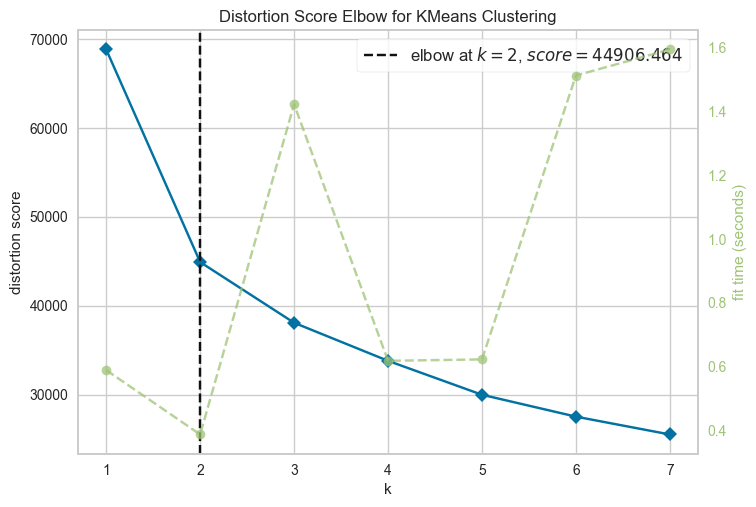

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 8))
 
# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)
 
# Menampilkan grafik elbow untuk analisis
visualizer.show()

- Hasil analisis metode elbow menunjukkan bahwa **jumlah cluster optimal adalah 2** dengan nilai total within-cluster sum of squares **(WCSS) sebesar 44,906.464**. Ini berarti bahwa membagi data menjadi 2 cluster memberikan keseimbangan terbaik antara meminimalkan jarak di dalam cluster dan memaksimalkan jarak antar cluster.

In [30]:
# Fit KMeans model
k = 2
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=random_state)
kmeans.fit(X)

print(f'Silhouette Score: {silhouette_score(X, kmeans.labels_):.4f}')

Silhouette Score: 0.3445


- Hasil cluster awal ini perlu dioptimasi dengan feature selection untuk mendapatkan silhouette score yang lebih tinggi

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, **bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection**.

### Feature Extraction: recency_days

In [31]:
df_opt = df_encoded.copy()
df_opt['invoice_date'].head()

0      5/8/2022
1    12/12/2021
2     9/11/2021
3    16/05/2021
4    24/10/2021
Name: invoice_date, dtype: object

In [32]:
# Convert 'invoice_date' to datetime
df_opt['invoice_date'] = pd.to_datetime(df_opt['invoice_date'], format='%d/%m/%Y')
df_opt['invoice_date'].describe()

count                         99457
mean     2022-02-04 02:46:59.783424
min             2021-01-01 00:00:00
25%             2021-07-19 00:00:00
50%             2022-02-05 00:00:00
75%             2022-08-22 00:00:00
max             2023-03-08 00:00:00
Name: invoice_date, dtype: object

In [33]:
# Reference date: March 9, 2023 since the last transaction was on 2021-03-08
reference_date = pd.to_datetime('2023-03-09')

# Calculate recency_days
df_opt['recency_days'] = (reference_date - df_opt['invoice_date']).dt.days
df_opt['recency_days'].describe()

count    99457.000000
mean       397.884030
std        229.871351
min          1.000000
25%        199.000000
50%        397.000000
75%        598.000000
max        797.000000
Name: recency_days, dtype: float64

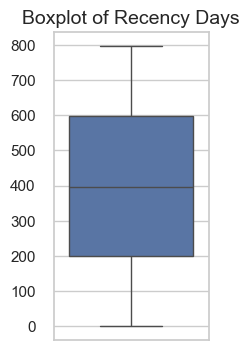

In [34]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a boxplot for the 'recency_days' column
plt.figure(figsize=(2, 4))
sns.boxplot(y=df_opt['recency_days'])

# Set the title and labels
plt.title('Boxplot of Recency Days', fontsize=14)
plt.ylabel('')

# Show the plot
plt.show()

In [35]:
# Normalize 'recency_days'
df_opt['recency_days_norm'] = minmax_scaler.fit_transform(df_opt[['recency_days']])
df_opt['recency_days_norm'].describe()

count    99457.000000
mean         0.498598
std          0.288783
min          0.000000
25%          0.248744
50%          0.497487
75%          0.750000
max          1.000000
Name: recency_days_norm, dtype: float64

### Feature Extraction: Year, Month

In [36]:
# Create 'year' and 'month' columns
df_opt['year'] = df_opt['invoice_date'].dt.year
df_opt['month'] = df_opt['invoice_date'].dt.month

df_opt[['year', 'month']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    99457 non-null  int32
 1   month   99457 non-null  int32
dtypes: int32(2)
memory usage: 777.1 KB


In [37]:
df_opt[['year', 'month']].describe()

,year,month
count,99457.000000,99457.000000
mean,2021.629408,6.113898
std,0.636136,3.569511
min,2021.000000,1.000000
25%,2021.000000,3.000000
50%,2022.000000,6.000000
75%,2022.000000,9.000000
max,2023.000000,12.000000


In [38]:
# Normalize 'year' & 'month'
df_opt['year_norm'] = minmax_scaler.fit_transform(df_opt[['year']])
df_opt['month_norm'] = minmax_scaler.fit_transform(df_opt[['month']])
df_opt[['year_norm', 'month_norm']].describe()

,year_norm,month_norm
count,99457.000000,99457.000000
mean,0.314704,0.464900
std,0.318068,0.324501
min,0.000000,0.000000
25%,0.000000,0.181818
50%,0.500000,0.454545
75%,0.500000,0.727273
max,1.000000,1.000000


### Feature Extraction: Transaction Value

In [39]:
df_opt['value'] = df['quantity'] * df['price']
df_opt['value_norm'] = minmax_scaler.fit_transform(df_opt[['value']])
df_opt[['quantity', 'price', 'value_norm']].head()

,quantity,price,value_norm
0,1.00,0.285078,0.285648
1,0.50,0.342299,0.205614
2,0.00,0.056218,0.011235
3,1.00,0.571163,0.571505
4,0.75,0.010557,0.009037


In [40]:
df_opt[['quantity', 'price', 'value', 'value_norm']].describe()

,quantity,price,value,value_norm
count,99457.000000,99457.000000,99457.000000,99457.000000
mean,0.500857,0.130421,2528.789268,0.096155
std,0.353256,0.179452,4222.475781,0.160888
min,0.000000,0.000000,5.230000,0.000000
25%,0.250000,0.007669,136.350000,0.004996
50%,0.500000,0.037765,600.170000,0.022669
75%,0.750000,0.227863,2700.720000,0.102706
max,1.000000,1.000000,26250.000000,1.000000


In [41]:
df_opt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   invoice_no           99457 non-null  object        
 1   customer_id          99457 non-null  object        
 2   gender               99457 non-null  int64         
 3   category             99457 non-null  object        
 4   quantity             99457 non-null  float64       
 5   price                99457 non-null  float64       
 6   payment_method       99457 non-null  object        
 7   invoice_date         99457 non-null  datetime64[ns]
 8   shopping_mall        99457 non-null  object        
 9   age_groups           97613 non-null  category      
 10  payment_method_freq  99457 non-null  float64       
 11  category_freq        99457 non-null  float64       
 12  shopping_mall_freq   99457 non-null  float64       
 13  recency_days         99457 non-

In [42]:
# Define columns to drop
columns_to_drop = ["recency_days", "year", "month", "value"]

# Safely drop columns if they exist in the DataFrame
df_opt.drop(columns=[col for col in columns_to_drop if col in df_opt.columns], inplace=True)

df_opt.columns


Index(['invoice_no', 'customer_id', 'gender', 'category', 'quantity', 'price',
       'payment_method', 'invoice_date', 'shopping_mall', 'age_groups',
       'payment_method_freq', 'category_freq', 'shopping_mall_freq',
       'recency_days_norm', 'year_norm', 'month_norm', 'value_norm'],
      dtype='object')

### Random Search

In [43]:
# Check all available features
features = list(df_opt.select_dtypes(include=['number', 'bool']).columns) # Ensure both numerical and boolean features are selected
features

['gender',
 'quantity',
 'price',
 'payment_method_freq',
 'category_freq',
 'shopping_mall_freq',
 'recency_days_norm',
 'year_norm',
 'month_norm',
 'value_norm']

In [44]:
def get_feature_combinations(features, min_size=2, max_size=3):
    """
    Generate feature combinations with controlled size range.

    This function takes a list of features and generates all possible combinations 
    of those features with a size range defined by `min_size` and `max_size`. 
    The size range is capped by the total number of features to prevent 
    generating invalid combinations. 

    Parameters:
        features (list): A list of feature names (strings) to generate combinations from.
        min_size (int, optional): The minimum number of features in each combination. 
                                  Default is 2.
        max_size (int, optional): The maximum number of features in each combination. 
                                  Default is 3. The value is automatically adjusted 
                                  if it exceeds the number of features in the input list.

    Returns:
        list: A list of lists, where each inner list represents a unique combination 
              of features within the specified size range.

    Example:
        features = ['A', 'B', 'C', 'D']
        min_size = 2
        max_size = 3
        get_feature_combinations(features, min_size, max_size)
        # Output:
        # [['A', 'B'], ['A', 'C'], ['A', 'D'], ['B', 'C'], ['B', 'D'], ['C', 'D'], 
        #  ['A', 'B', 'C'], ['A', 'B', 'D'], ['A', 'C', 'D'], ['B', 'C', 'D']]
    """
    max_size = min(max_size, len(features))
    return [
        list(comb) 
        for i in range(min_size, max_size + 1) 
        for comb in combinations(features, i)
    ]

In [45]:
min_size_0 = max_size_0 = 2
feature_combinations_0 = get_feature_combinations(features, min_size=min_size_0, max_size=max_size_0)

print(f"With a {min_size_0} features, there are {len(feature_combinations_0):,} feature combinations available for evaluation.")

With a 2 features, there are 45 feature combinations available for evaluation.


In [46]:
min_size_1 = max_size_1 = 3
feature_combinations_1 = get_feature_combinations(features, min_size=min_size_1, max_size=max_size_1)

print(f"With {min_size_1} features, there are {len(feature_combinations_1):,} feature combinations.")

With 3 features, there are 120 feature combinations available for evaluation.


In [47]:
min_size_2 = 4
max_size_2 = 5
feature_combinations_2 = get_feature_combinations(features, min_size=min_size_2, max_size=max_size_2)

print(f"With a minimum of {min_size_2} features and a maximum of {max_size_2}, there are {len(feature_combinations_2):,} feature combinations.")

With a minimum of 4 features and a maximum of 5, there are 462 feature combinations available for evaluation.


In [48]:
def find_optimum_cluster_features_random(df, feature_combinations, n_iter=100, silhouette_threshold=0.7):
    """
    Perform random search over feature combinations to find the best set of features for KMeans clustering.
    
    Args:
    - feature_combinations (list): List of all possible feature combinations.
    - n_iter (int): Number of random iterations to perform.
    - silhouette_threshold (float): Silhouette score threshold to stop the search early.

    Returns:
    - best_features (list): Best feature combination found.
    - best_score (float): Silhouette score of the best feature combination.
    """
    # Initialize variables to track the best score and features
    best_score = -1
    best_features = None

    print("Starting random search over feature subsets...\n")
    
    # Randomly select subsets to evaluate
    for i in range(n_iter):
        subset = random.choice(feature_combinations)  # Randomly pick a feature combination
        
        # Subset the data
        df_subset = df[subset]

        try:
            # Fit K-means
            kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=random_state)
            labels = kmeans.fit_predict(df_subset)
            
            # Calculate Silhouette Score
            score = silhouette_score(df_subset, labels)

            # Update the best score and features if applicable
            if score > best_score:
                best_score = score
                best_features = subset
                print(f"Iteration {i + 1}: New best found! Features: {subset}, Silhouette Score: {score:.4f}")
                
                # Stop the loop if the silhouette score reaches the desired threshold
                if best_score >= silhouette_threshold:
                    print("Stopping early as the silhouette score threshold has been reached.")
                    break
            else:
                print(f"Iteration {i + 1}: Features: {subset}, Silhouette Score: {score:.4f}")  # Log current iteration result
            
        except Exception as e:
            print(f"Iteration {i + 1}: Failed for subset {subset} with error: {e}")

    # Print the best results
    print("\nRandom search completed.")
    print(f"Best Feature Combination: {best_features}, Silhouette Score: {best_score:.4f}")
    return best_features, best_score

In [49]:
best_features_0, best_score_0 = find_optimum_cluster_features_random(df_opt, feature_combinations_0, n_iter=25, silhouette_threshold=0.85)

Starting random search over feature subsets...

Iteration 1: New best found! Features: ['quantity', 'price'], Silhouette Score: 0.5514
Iteration 2: New best found! Features: ['gender', 'year_norm'], Silhouette Score: 0.7043
Iteration 3: Features: ['quantity', 'shopping_mall_freq'], Silhouette Score: 0.4529
Iteration 4: Features: ['category_freq', 'month_norm'], Silhouette Score: 0.4001
Iteration 5: New best found! Features: ['gender', 'shopping_mall_freq'], Silhouette Score: 0.7449
Iteration 6: Features: ['price', 'value_norm'], Silhouette Score: 0.7202
Iteration 7: Features: ['quantity', 'year_norm'], Silhouette Score: 0.4122
Iteration 8: New best found! Features: ['gender', 'value_norm'], Silhouette Score: 0.8696
Stopping early as the silhouette score threshold has been reached.

Random search completed.
Best Feature Combination: ['gender', 'value_norm'], Silhouette Score: 0.8696


In [50]:
best_features_1, best_score_1 = find_optimum_cluster_features_random(df_opt, feature_combinations_1, n_iter=50, silhouette_threshold=0.8)

Starting random search over feature subsets...

Iteration 1: New best found! Features: ['price', 'recency_days_norm', 'value_norm'], Silhouette Score: 0.4469
Iteration 2: Features: ['quantity', 'payment_method_freq', 'year_norm'], Silhouette Score: 0.3076
Iteration 3: New best found! Features: ['gender', 'price', 'value_norm'], Silhouette Score: 0.7963
Iteration 4: Features: ['quantity', 'price', 'value_norm'], Silhouette Score: 0.5259
Iteration 5: Features: ['payment_method_freq', 'month_norm', 'value_norm'], Silhouette Score: 0.3987
Iteration 6: Features: ['price', 'payment_method_freq', 'value_norm'], Silhouette Score: 0.5810
Iteration 7: Features: ['quantity', 'category_freq', 'shopping_mall_freq'], Silhouette Score: 0.3242
Iteration 8: Features: ['shopping_mall_freq', 'recency_days_norm', 'value_norm'], Silhouette Score: 0.3499
Iteration 9: Features: ['gender', 'price', 'recency_days_norm'], Silhouette Score: 0.6281
Iteration 10: Features: ['price', 'payment_method_freq', 'shoppin

- Berdasarkan output ini, dapat dibuat 'educated guess' terhadap potential fitur optimal dengan size 4 atau 5
- Educated guess ini selanjutnya dievaluasi seluruhnya satu per satu dengan grid search

### Grid Search

In [55]:
feature_combination_2_guess = [
    ['gender', 'price', 'value_norm', 'recency_days_norm'],
    ['gender', 'price', 'value_norm', 'year_norm'],
    ['gender', 'price', 'value_norm', 'category_freq'],
    ['gender', 'price', 'value_norm', 'payment_method_freq'],
    ['gender', 'price', 'value_norm', 'recency_days_norm', 'year_norm'],
    ['gender', 'price', 'value_norm', 'category_freq', 'shopping_mall_freq'],
    ['gender', 'price', 'value_norm', 'payment_method_freq', 'year_norm'],
    ['gender', 'price', 'value_norm', 'recency_days_norm', 'payment_method_freq'],
]

In [56]:
def find_optimum_cluster_features(df, feature_combinations, silhouette_threshold=0.7):
    # Initialize variables to track the best score and features
    best_score = -1
    best_features = None

    print("Starting grid search over feature subsets...\n")
    for subset in feature_combinations:
        # Subset the data
        df_subset = df[subset]

        try:
            # Fit K-means
            kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=random_state)
            labels = kmeans.fit_predict(df_subset)
            
            # Calculate Silhouette Score
            score = silhouette_score(df_subset, labels)

            # Update the best score and features if applicable
            if score > best_score:
                best_score = score
                best_features = subset
                print(f"New best found! Features: {subset}, Silhouette Score: {score:.4f}")
                
                # Stop the loop if the silhouette score reaches the desired threshold
                if best_score >= silhouette_threshold:
                    print("Stopping early as the silhouette score threshold (0.7) has been reached.")
                    break
            else:
                print(f"Features: {subset}, Silhouette Score: {score:.4f}")  # Log current iteration result
            
        except Exception as e:
            print(f"Failed for subset {subset} with error: {e}")

    # Print the best results
    print("\nGrid search completed.")
    print(f"Best Feature Combination: {best_features}, Silhouette Score: {best_score:.4f}")

In [ ]:
best_features_2, best_score_2 = find_optimum_cluster_features(df_opt, feature_combination_2_guess, silhouette_threshold=0.7)

Starting grid search over feature subsets...

New best found! Features: ['gender', 'price', 'value_norm', 'recency_days_norm'], Silhouette Score: 0.5013
New best found! Features: ['gender', 'price', 'value_norm', 'year_norm'], Silhouette Score: 0.5884
Features: ['gender', 'price', 'value_norm', 'category_freq'], Silhouette Score: 0.5716


### Re-train Model with Optimized Features

In [45]:
optimized_features = best_features_2
# Ensure the selected columns are numeric for clustering
X1 = df_opt[optimized_features].values  # Extract only numerical features
X1

array([[1.00000000e+00, 2.85078278e-01, 2.85648150e-01],
       [5.00000000e-01, 3.42299090e-01, 2.05614300e-01],
       [0.00000000e+00, 5.62179085e-02, 1.12346193e-02],
       ...,
       [2.50000000e-01, 9.97183861e-04, 5.97833397e-04],
       [7.50000000e-01, 7.99800563e-01, 6.39928260e-01],
       [5.00000000e-01, 5.71235726e-03, 3.82323793e-03]], shape=(99457, 3))

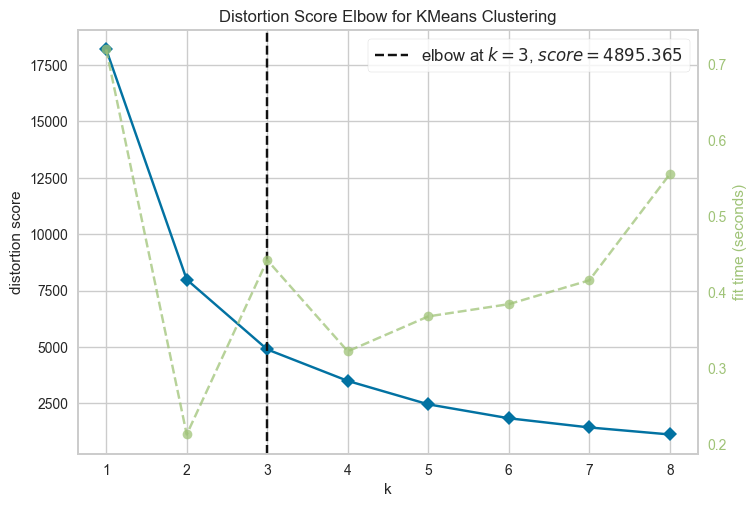

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
kmeans_1 = KMeans(init='k-means++', n_init=10, random_state=random_state)

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans_1, k=(1, 8))
 
# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X1)
 
# Menampilkan grafik elbow untuk analisis
visualizer.show()

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.